In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import re

In [ ]:
sentences = "There was a time when he would have embraced the change that was coming. In his youth, he sought adventure and the unknown, but that had been years ago. He wished he could go back and learn to find the excitement that came with change but it was useless. That curiosity had long left him to where he had come to loathe anything that put him out of his comfort zone."

In [ ]:
# remove special character
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

#remove 1 letter word
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# Lower characters
sentences = sentences.lower()

In [ ]:
sentences

'there was time when he would have embraced the change that was coming in his youth he sought adventure and the unknown but that had been years ago he wished he could go back and learn to find the excitement that came with change but it was useless that curiosity had long left him to where he had come to loathe anything that put him out of his comfort zone'

In [ ]:
words = sentences.split()
vocab = set(words)

In [ ]:
vocab_size= len(vocab)
embed_dim = 10
context_size = 2

In [ ]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i:word for i, word in enumerate(vocab)}

In [ ]:
data = []
for i in range(2, len(words)-2):
  context = [words[i-2], words[i-1], words[i+1], words[i+2]]
  target = words[i]
  data.append((context, target))
print(data[:5])

[(['there', 'was', 'when', 'he'], 'time'), (['was', 'time', 'he', 'would'], 'when'), (['time', 'when', 'would', 'have'], 'he'), (['when', 'he', 'have', 'embraced'], 'would'), (['he', 'would', 'embraced', 'the'], 'have')]


In [ ]:
embeddings = np.random.random_sample((vocab_size, embed_dim))

In [ ]:
embeddings.shape

(49, 10)

In [ ]:
def linear(m, theta):
  w = theta
  return m.dot(w)

In [ ]:
def log_softmax(x):
  e_x = np.exp(x - np.max(x))
  return np.log(e_x/e_x.sum())

In [ ]:
def NLLLoss(logs, targets):
  out = logs[range(len(targets)), targets]
  return out.sum()/len(out)

Cross_entroy = log_softmax + NLLLoss

In [ ]:
def cross_entropy(logits, target):
  out = np.zeros_like(logits)
  out[np.arange(len(logits)), target] = 1
  softmax = np.exp(logits) / np.exp(logits).sum(axis=-1, keepdims=True)
  return (-out+softmax) / logits.shape[0]

Forward

In [ ]:
def forward(context_idxs, theta):
  m = embeddings[context_idxs].reshape(1,-1)
  n = linear(m, theta)
  o = log_softmax(n)
  return m, n, o

Backward

In [ ]:
def backward(preds, theta, target_idxs):
  m, n, o = preds

  dlog = cross_entropy(n, target_idxs)
  dw = m.T.dot(dlog)
  return dw

Optimizer

In [ ]:
def optimize(theta, grad, lr=0.03):
  theta -= grad * lr
  return theta

Training

In [ ]:
theta = np.random.uniform(-1, 1, (2*context_size*embed_dim, vocab_size))

In [ ]:
epoch_losses = {}

for epoch in range(80):
  losses = []
  for context, target in data:
    context_idxs = np.array([word_to_ix[w] for w in context])
    preds = forward(context_idxs, theta)

    target_idxs = np.array([word_to_ix[target]])
    loss = NLLLoss(preds[-1], target_idxs)

    losses.append(loss)

    grad = backward(preds, theta, target_idxs)
    theta  = optimize(theta, grad, lr=0.03)
  epoch_losses[epoch] = losses

Evalutaion

Text(0, 0.5, 'Losses')

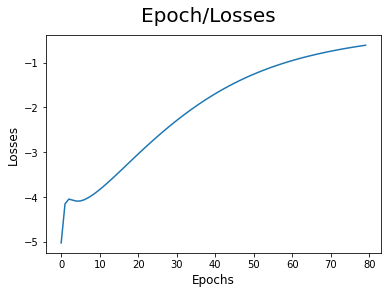

In [ ]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

Prediction

In [ ]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [ ]:
predict(['was', 'time', 'he', 'would'])

'when'

Accuracy

In [ ]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [ ]:
accuracy()

1.0